# Project 5A - Introduction to Linear Regression

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
cars = pd.read_csv("mpg.csv")
nhanes = pd.read_csv("nhanes.csv")

## Cars

1. Reproduce the scatter plot Graph A, Participation Activity 7.1.3
    - Find mpg.csv in ../A-Data/
    - Read it into a dataframe, cars
    - Use cars.columns to find the columns you need
    - Having found the columns, remove those where one or the other has missing data: 
    - df = cars[["mpg", "weight"]].dropna()
    - Extract the x and y columns as lists
    - Plot y against x, labeling the columns and the graph itself


In [12]:
print(cars.info(verbose=True))
print(cars.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')


In [13]:
cars = cars[["mpg", "weight"]].dropna()

In [14]:
print(cars.info(verbose=True))
print(cars.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   weight  398 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 6.3 KB
None
Index(['mpg', 'weight'], dtype='object')


- Extract the x and y columns as lists
- Plot y against x, labeling the columns and the graph itself


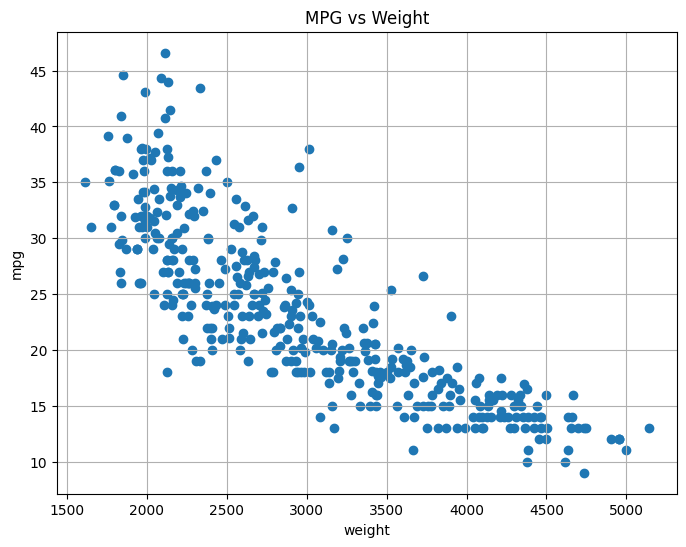

In [15]:
# Extract the x and y columns as lists
x = cars['weight'].tolist()
y = cars['mpg'].tolist()

# Plot y against x, labeling the columns and the graph itself
plt.figure(figsize=(8,6))
plt.scatter(x, y)
plt.xlabel('weight')
plt.ylabel('mpg')
plt.title('MPG vs Weight')
plt.grid(True)
plt.show()

## NHanes

2. Using the same scatter plot function, plot the probability of having diabetes (y) against age (x)
    - Use the nhanes data set as before 
    - The columns of interest are Age and Diabetes
    - Here’s the technique:
    - Add a new column with a 1/0 for every Yes/No in the Diabetes column
    - nhanes["Diabetes_num"] = nhanes["Diabetes"].map({"Yes": 1, "No": 0})
    - Group by Age and compute the mean sum of the 1’s and 0’s.  This gives the probability of having diabetes at a certain age.  You used group-by in In-Class Project 4.  I give a simple example of group-by in my GitHub repo: 
    - …/CPSC222/F-Wrangle-Manipulate/B-Wrangling.ipynb
    - Plot the probability you just computed against age, labeling both axes and the graph itself. 


In [16]:
print(nhanes.columns)

Index(['ID', 'SurveyYr', 'Gender', 'Age', 'AgeDecade', 'AgeMonths', 'Race1',
       'Race3', 'Education', 'MaritalStatus', 'HHIncome', 'HHIncomeMid',
       'Poverty', 'HomeRooms', 'HomeOwn', 'Work', 'Weight', 'Length',
       'HeadCirc', 'Height', 'BMI', 'BMICatUnder20yrs', 'BMI_WHO', 'Pulse',
       'BPSysAve', 'BPDiaAve', 'BPSys1', 'BPDia1', 'BPSys2', 'BPDia2',
       'BPSys3', 'BPDia3', 'Testosterone', 'DirectChol', 'TotChol',
       'UrineVol1', 'UrineFlow1', 'UrineVol2', 'UrineFlow2', 'Diabetes',
       'DiabetesAge', 'HealthGen', 'DaysPhysHlthBad', 'DaysMentHlthBad',
       'LittleInterest', 'Depressed', 'nPregnancies', 'nBabies', 'Age1stBaby',
       'SleepHrsNight', 'SleepTrouble', 'PhysActive', 'PhysActiveDays',
       'TVHrsDay', 'CompHrsDay', 'TVHrsDayChild', 'CompHrsDayChild',
       'Alcohol12PlusYr', 'AlcoholDay', 'AlcoholYear', 'SmokeNow', 'Smoke100',
       'Smoke100n', 'SmokeAge', 'Marijuana', 'AgeFirstMarij', 'RegularMarij',
       'AgeRegMarij', 'HardDrugs', 'SexEve

In [17]:
# Map Diabetes Yes/No to numeric 1/0 and compute probability by Age
nhanes["Diabetes_num"] = nhanes["Diabetes"].map({"Yes": 1, "No": 0})
prob_by_age = nhanes.dropna(subset=["Age", "Diabetes_num"]).groupby("Age")["Diabetes_num"].mean().reset_index()

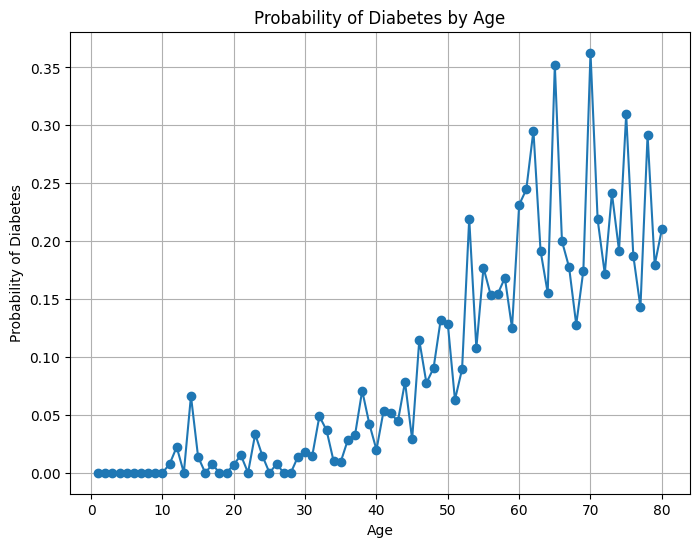

In [18]:
# Plot the probability against Age
plt.figure(figsize=(8,6))
plt.plot(prob_by_age['Age'], prob_by_age['Diabetes_num'], marker='o')
plt.xlabel('Age')
plt.ylabel('Probability of Diabetes')
plt.title('Probability of Diabetes by Age')
plt.grid(True)
plt.show()